Data from Without Blanks:
    Year     1     2     3     4     5     6     7     8     9    10    11  \
0  1906  2.60  2.14  3.35  0.74  3.31  3.60  2.06  4.63  2.11  1.98  2.99   
1  1907  6.12  0.16  3.82  2.02  2.58  4.46  7.50  2.18  2.12  1.88  1.64   
2  1908  0.81  1.54  3.24  2.99  3.66  1.95  3.15  1.29  0.61  0.52  0.96   
3  1909  2.28  4.08  2.91  4.74  3.84  3.42  3.33  5.36  1.72  3.17  2.76   
4  1910  3.44  2.52  0.18  2.66  3.61  2.46  3.53  1.90  4.92  5.02  2.26   

     12  
0  2.88  
1  1.38  
2  1.28  
3  2.38  
4  1.63  
Long format data:
    Year  month  rainfall
0  1906      1      2.60
1  1907      1      6.12
2  1908      1      0.81
3  1909      1      2.28
4  1910      1      3.44


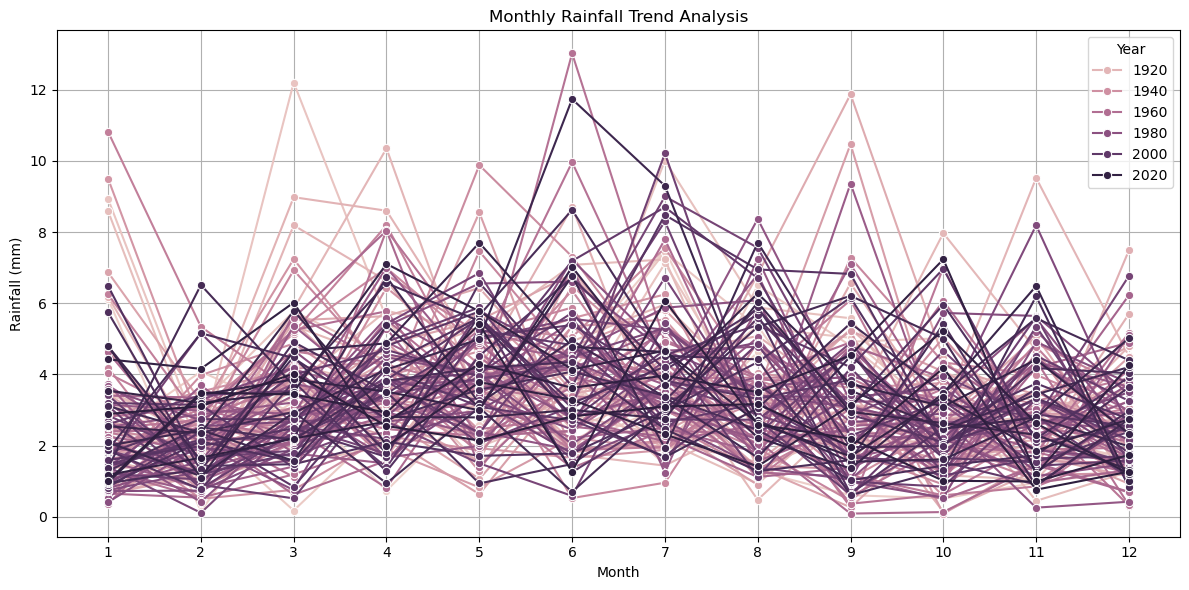

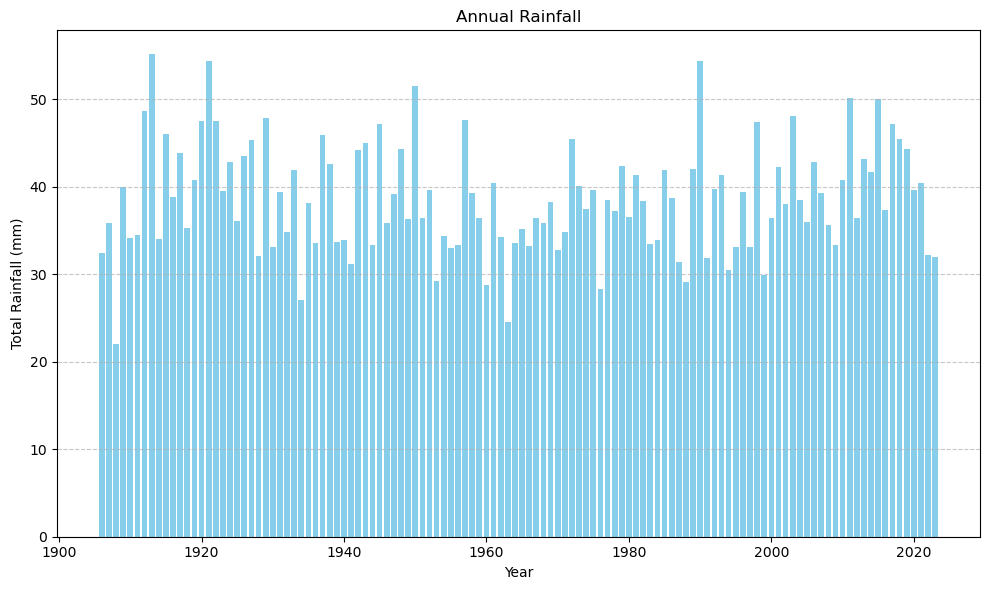

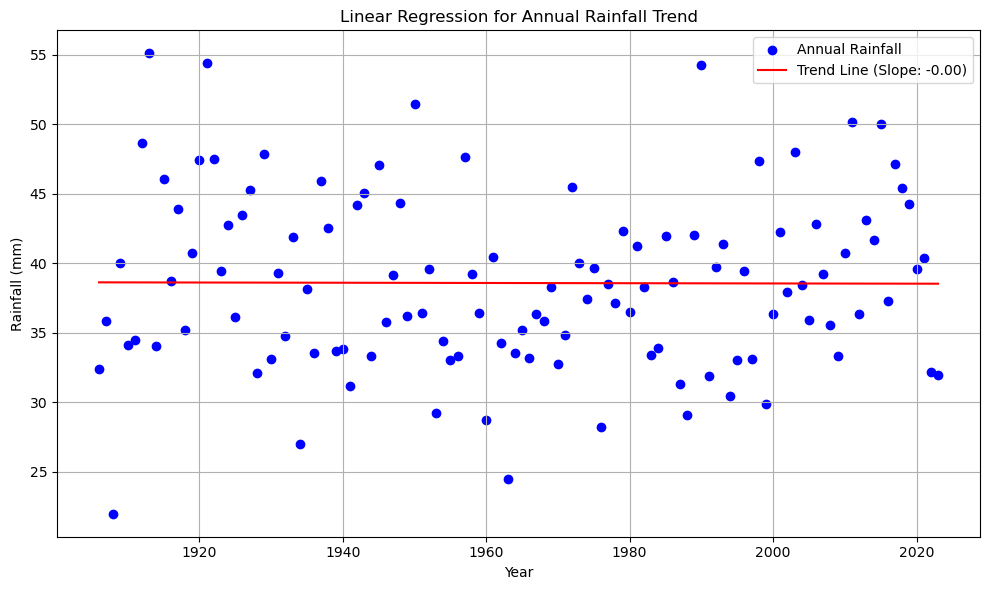

Mann-Kendall Trend Test result: Mann_Kendall_Test(trend='no trend', h=False, p=0.9295708726155316, z=0.08838476129822108, Tau=0.005649717514124294, s=39.0, var_s=184847.0, slope=0.001546391752577305, intercept=38.19370274914089)
The trend is not statistically significant.

Descriptive Statistics (Annual Rainfall):
count    118.000000
mean      38.580756
std        6.303644
min       22.000000
25%       33.865000
50%       38.284167
75%       42.485000
max       55.090000
Name: rainfall, dtype: float64


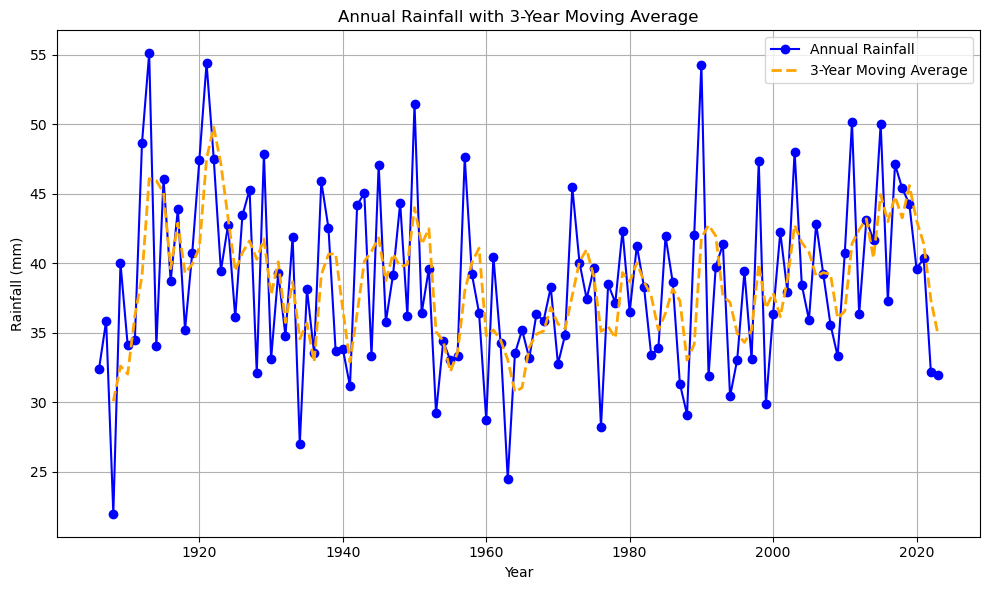

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from pymannkendall import original_test

# Load the data from the specified sheet
file_path = '/Users/Ankith674/Desktop/Salamonie/average_precipitation_pivoted_SALAMONIE.xlsx'
try:
    df = pd.read_excel(file_path, sheet_name='Without Blanks', header=0)  # Use first row as header
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    raise FileNotFoundError("Stopping execution because the file could not be located.")
except ValueError as e:
    print(f"Error: {e}")
    raise ValueError("The specified sheet does not exist in the file.")

# Preview the data to check its structure
print("Data from Without Blanks:\n", df.head())

# Reshape the data from wide format to long format
# 'year' column will remain as is, and months (1, 2, ..., 12) will be melted into a single 'month' column
df_long = df.melt(id_vars=["Year"], var_name="month", value_name="rainfall")

# Convert 'month' to integers
df_long['month'] = df_long['month'].astype(int)

# Preview the reshaped data
print("Long format data:\n", df_long.head())

# Plot the Rainfall data over the years (month-wise)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x='month', y='rainfall', hue='Year', marker='o')
plt.title("Monthly Rainfall Trend Analysis")
plt.xlabel("Month")
plt.ylabel("Rainfall (mm)")
plt.grid(True)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

# Aggregate rainfall by year (sum or mean)
df_yearly = df_long.groupby('Year')['rainfall'].sum().reset_index()  # Use .mean() if you prefer average rainfall

# Plot annual rainfall
plt.figure(figsize=(10, 6))
plt.bar(df_yearly['Year'], df_yearly['rainfall'], color='skyblue')
plt.title("Annual Rainfall")
plt.xlabel("Year")
plt.ylabel("Total Rainfall (mm)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Linear regression to find the trend (slope)
slope, intercept, r_value, p_value, std_err = linregress(df_yearly['Year'], df_yearly['rainfall'])

# Plotting linear regression
plt.figure(figsize=(10, 6))
plt.scatter(df_yearly['Year'], df_yearly['rainfall'], color='blue', label='Annual Rainfall')
plt.plot(df_yearly['Year'], intercept + slope * df_yearly['Year'], 'r', label=f"Trend Line (Slope: {slope:.2f})")
plt.title("Linear Regression for Annual Rainfall Trend")
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Mann-Kendall Trend Test for Statistical Significance
result = original_test(df_yearly['rainfall'])
print(f"Mann-Kendall Trend Test result: {result}")

# Check if the trend is statistically significant (p-value < 0.05)
if result.p < 0.05:
    print("The trend is statistically significant.")
else:
    print("The trend is not statistically significant.")

# Calculate and display Descriptive Statistics for annual rainfall
print("\nDescriptive Statistics (Annual Rainfall):")
print(df_yearly['rainfall'].describe())

# Moving Average (e.g., 3-year moving average)
df_yearly['3_year_MA'] = df_yearly['rainfall'].rolling(window=3).mean()

# Plotting the Moving Average
plt.figure(figsize=(10, 6))
plt.plot(df_yearly['Year'], df_yearly['rainfall'], label='Annual Rainfall', marker='o', color='b')
plt.plot(df_yearly['Year'], df_yearly['3_year_MA'], label='3-Year Moving Average', color='orange', linestyle='--', linewidth=2)
plt.title("Annual Rainfall with 3-Year Moving Average")
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
